In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


def plot_results(df):
    """Plots the results from the saved DataFrame."""
    sns.set_theme(style="whitegrid", font_scale=1.5, rc={"axes.labelsize": 14, "axes.titlesize": 16})

    result_path = Path(".") / "figs"
    result_path.mkdir(parents=True, exist_ok=True)

    fig, axs = plt.subplots(nrows=2, figsize=(12, 6), sharex=False)

    for i, dataset_name in enumerate(df["Dataset"].unique()):
        df_subset = df[df["Dataset"] == dataset_name]

        ax = sns.boxplot(
            x="Task Type", y="F1 Score", hue="Model",
            data=df_subset, width=0.6, linewidth=1.5, ax=axs[i]
        )

        # Set subplot aesthetics
        ax.set_ylabel("F1 Score", fontsize=16, labelpad=10)
        if i == 0:
            ax.set_title(f"F1 Score Comparison on both datasets", fontsize=18, pad=15)

        if i == 0:
            ax.legend(title="Model", title_fontsize=14, fontsize=12, loc="lower right", frameon=True)
        else:
            ax.legend_.remove()

        # Explicitly set x-tick labels only on the bottom plot
        if i == len(df["Dataset"].unique()) - 1:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="center", fontsize=14)
            ax.set_xlabel("Task Type", fontsize=16, labelpad=10)
        else:
            ax.set_xlabel('')
            ax.set_xticklabels([])  # Remove x labels from upper subplot

        # Grid styling
        ax.grid(axis="y", linestyle="--", alpha=0.7)

    # Fix layout
    plt.tight_layout()

    # Save figure in high resolution
    plt.savefig(result_path / "result-rcd.pdf", dpi=300, bbox_inches="tight")
    plt.savefig(result_path / "result-rcd.png", dpi=300, bbox_inches="tight")
    print(f"Results saved to {result_path / 'result-rcd.pdf'}")
    print(f"Results saved to {result_path / 'result-rcd.png'}")

/var/folders/19/8dpm1qss7mn34db1f49thmww0000gn/T/ipykernel_4160/4209042959.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="center", fontsize=14)


Results saved to figs/result-rcd.pdf
Results saved to figs/result-rcd.png


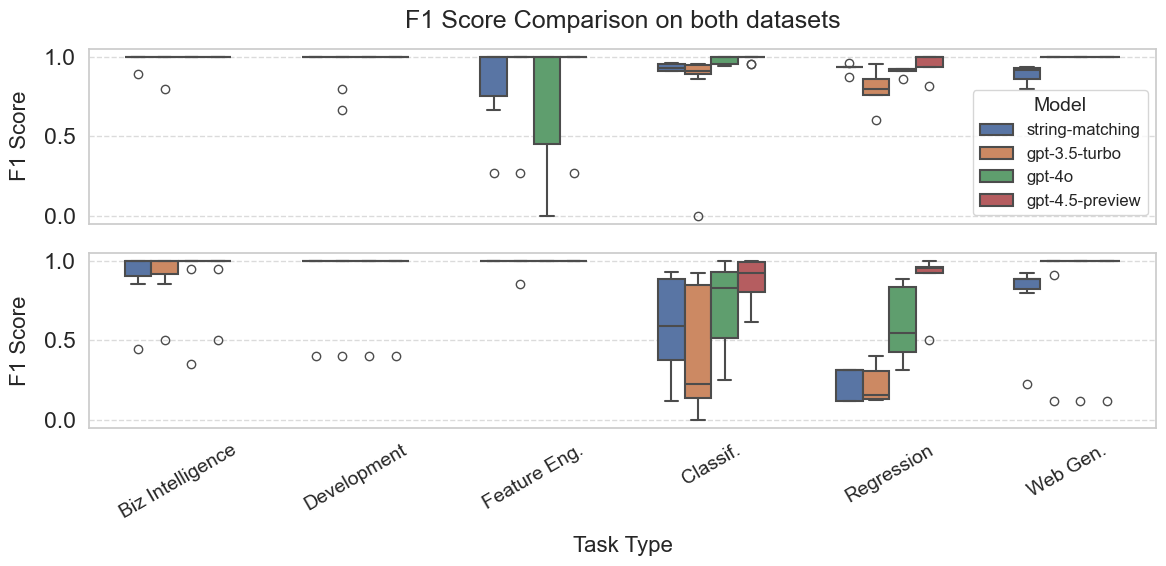

In [2]:
dataset_name_options = ["playground-series-s4e10", "healthcare_dataset"]
model_names = ["string-matching", "gpt-3.5-turbo", "gpt-4o", "gpt-4.5-preview"]
processed_data_label = '0'

df_results = pd.read_csv(Path(".") / "tables" / "rcd_results.csv")

plot_results(df_results)